In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp


# 0. Defining the ODE system

In [26]:
def damped_oscillator_bvp(t, y, zeta=0.25):
    x, v = y
    dxdt = v
    dvdt = -2 * zeta * v - x
    return [dxdt, dvdt]


# 1. Shooting Method

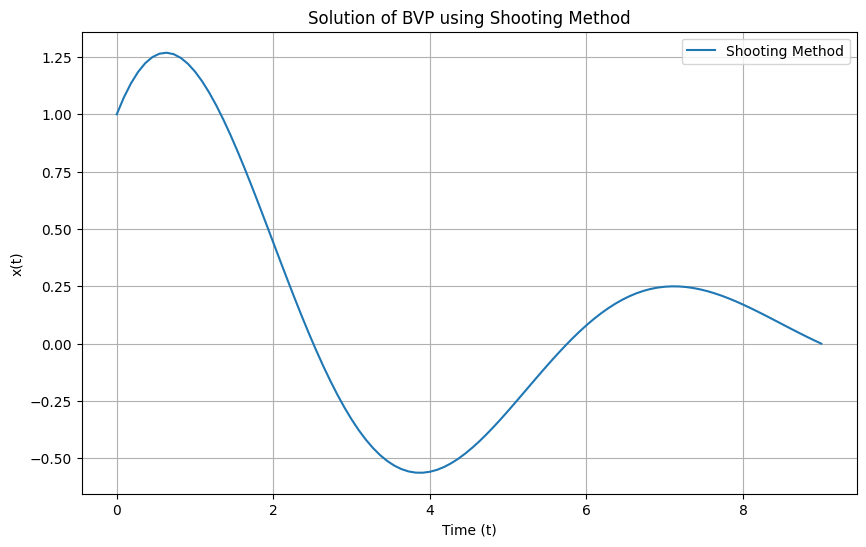

In [27]:
# Function to shoot and return the value at the boundary
def shoot(v0, zeta=0.25):
    sol = solve_ivp(damped_oscillator_bvp, [0, 9], [1, v0], args=(zeta,), t_eval=[9])
    return sol.y[0, -1]

# Find the initial velocity that satisfies the boundary condition at t=9
from scipy.optimize import root_scalar

sol_shooting = root_scalar(shoot, bracket=[-10, 10], method='bisect')
v0_shooting = sol_shooting.root

# Solve the ODE with the found initial velocity
sol_ivp_shooting = solve_ivp(damped_oscillator_bvp, [0, 9], [1, v0_shooting], args=(0.25,), t_eval=np.linspace(0, 9, 100))

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(sol_ivp_shooting.t, sol_ivp_shooting.y[0], label='Shooting Method')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Solution of BVP using Shooting Method')
plt.legend()
plt.grid()
plt.show()


# 2. Finite Difference Method

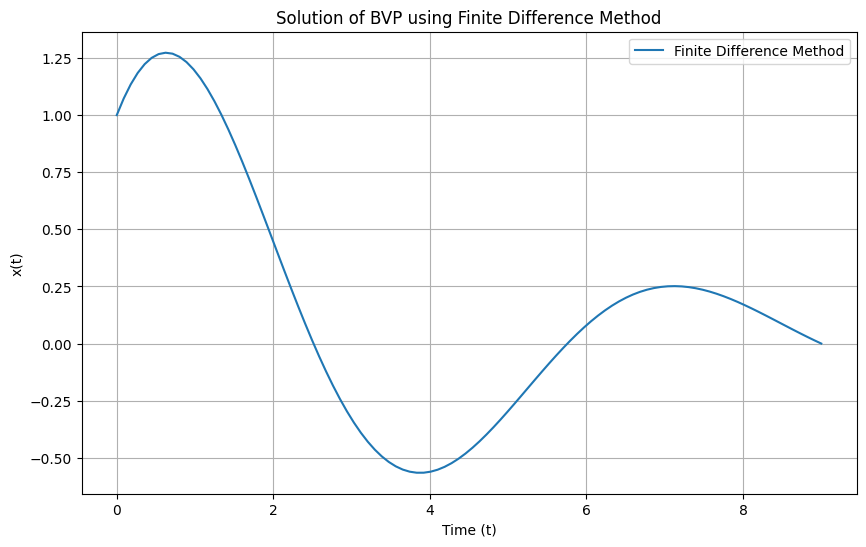

In [28]:
def finite_difference_method(n=100, zeta=0.25, t0=0, tf=9, x0=1, xf=0):
    h = (tf - t0) / (n + 1)
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    # Coefficients for the finite difference equation
    a = 1 / h**2 + zeta / h
    b_mid = -2 / h**2 + 1
    c = 1 / h**2 - zeta / h

    # Construct the matrix A and vector b
    for i in range(n):
        if i != 0:
            A[i, i-1] = c
        A[i, i] = b_mid
        if i != n-1:
            A[i, i+1] = a

    # Boundary conditions
    b[0] = -c * x0
    b[-1] = -a * xf

    # Solve the linear system
    x_internal = np.linalg.solve(A, b)
    
    # Append the boundary values
    x = np.concatenate(([x0], x_internal, [xf]))

    # Generate the time points
    t = np.linspace(t0, tf, n+2)

    return t, x

# Solve using finite difference method
t_fd, x_fd = finite_difference_method()

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(t_fd, x_fd, label='Finite Difference Method')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Solution of BVP using Finite Difference Method')
plt.legend()
plt.grid()
plt.show()

# 3. scipy.integrate.solve_bvp

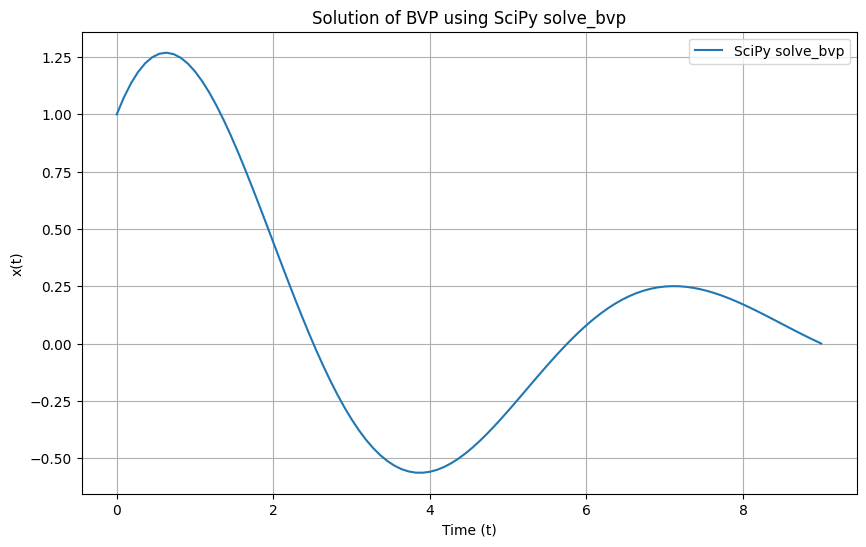

In [34]:

def bvp_bc(ya, yb):
    return np.array([ya[0] - 1, yb[0]])

# Initial guess for the solution
t_guess = np.linspace(0, 9, 100)
y_guess = np.zeros((2, t_guess.size))
y_guess[0] = np.linspace(1, 0, t_guess.size)

# Solve the BVP
sol_bvp = solve_bvp(damped_oscillator_bvp, bvp_bc, t_guess, y_guess)

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(sol_bvp.x, sol_bvp.y[0], label='SciPy solve_bvp')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Solution of BVP using SciPy solve_bvp')
plt.legend()
plt.grid()
plt.show()
